# Data Analytics Capstone Notebook

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Import Data Source

In [4]:
df = pd.read_csv('bodyfat.csv')

### Data Description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### Add "BMI" Feature

In [9]:
# Conversions
df['Height (m)'] = df['Height'] * 0.0254 # 1 inch = 0.0254 meters
df['Weight (kg)'] = df['Weight'] * 0.453592 # 1 pound = 0.453592 kilograms

# Calculate the BMI score
df['BMI'] = df['Weight (kg)']/(df['Height (m)'] ** 2)

# Limit the output to two decimal points
df['BMI'] = df['BMI'].round(2)

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_bodyfat.csv', index=False)

### Add "BMI Body Fat" Percentage Feature

In [10]:
# Calculate the Body Fat Percentage using the given formula
df['BMI Body Fat'] = 1.20 * df['BMI'] + 0.23 * df['Age'] - 16.2

# Limit the output to two decimal points
df['BMI Body Fat'] = df['BMI Body Fat'].round(2)

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_bodyfat.csv', index=False)

### Add "Navy Body Fat" Percentage Feature

In [11]:
# Convert height and abdomen from centimeters to inches (1 cm = 0.393701 inches)
df['neck_in'] = df['Neck'] * 0.393701
df['abdomen_in'] = df['Abdomen'] * 0.393701


# Calculate the Body Fat Percentage using the given formula
df['Navy Body Fat'] = (
    86.010 * np.log10(df['abdomen_in'] - df['neck_in']) -
    70.041 * np.log10(df['Height']) +
    36.76
)

# Limit the output to two decimal points
df['Navy Body Fat'] = df['Navy Body Fat'].round(2)

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_bodyfat.csv', index=False)

### Removed Unnecessary Columns

In [14]:
# List of columns to remove
columns_to_remove = ['Height (m)', 'Weight (kg)', 'neck_in', 'abdomen_in'] # Enter the name of the columns that need to be removed ['column name']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_bodyfat.csv', index=False)

### Transformed Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Density        252 non-null    float64
 1   BodyFat        252 non-null    float64
 2   Age            252 non-null    int64  
 3   Weight         252 non-null    float64
 4   Height         252 non-null    float64
 5   Neck           252 non-null    float64
 6   Chest          252 non-null    float64
 7   Abdomen        252 non-null    float64
 8   Hip            252 non-null    float64
 9   Thigh          252 non-null    float64
 10  Knee           252 non-null    float64
 11  Ankle          252 non-null    float64
 12  Biceps         252 non-null    float64
 13  Forearm        252 non-null    float64
 14  Wrist          252 non-null    float64
 15  BMI            252 non-null    float64
 16  BMI Body Fat   252 non-null    float64
 17  Navy Body Fat  252 non-null    float64
dtypes: float64

### Updated Description

In [16]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BMI Body Fat,Navy Body Fat
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.941984,25.253929,21.593095
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.558586,11.942399,6.363842
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,18.020000,12.630000,7.030000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,23.040000,21.122500,17.432500
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,25.095000,24.385000,21.340000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.335000,27.320000,25.150000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,165.620000,192.660000,56.440000


### Correlation Summary

In [17]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BMI Body Fat,Navy Body Fat
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716,-0.364432,-0.417430,-0.825438
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575,0.371383,0.427461,0.834253
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531,0.039904,0.281058,0.282595
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775,0.390598,0.372084,0.707693
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065,-0.638016,-0.654430,-0.260289
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826,0.266284,0.283343,0.523329
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162,0.383356,0.411063,0.797570
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832,0.414934,0.454484,0.915266
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090,0.462006,0.431532,0.752024
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685,0.432738,0.367070,0.658640


array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Neck', ylabel='Weight'>,
        <Axes: xlabel='Thigh', ylabel='Weight'>,
        <Axes: xlabel='Knee', ylabel='Weight'>,
        <Axes: xlabel='Ankle', ylabel='Weight'>,
        <Axes: xlabel='Biceps', ylabel='Weight'>,
        <Axes: xlabel='Forearm', ylabel='Weight'>,
        <Axes: xlabel='Wrist', ylabel='Weight'>,
        <Axes: xlabel='BodyFat', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Neck'>,
        <Axes: xlabel='Neck', ylabel='Neck'>,
        <Axes: xlabel='Thigh', ylabel='Neck'>,
        <Axes: xlabel='Knee', ylabel='Neck'>,
        <Axes: xlabel='Ankle', ylabel='Neck'>,
        <Axes: xlabel='Biceps', ylabel='Neck'>,
        <Axes: xlabel='Forearm', ylabel='Neck'>,
        <Axes: xlabel='Wrist', ylabel='Neck'>,
        <Axes: xlabel='BodyFat', ylabel='Neck'>],
       [<Axes: xlabel='Weight', ylabel='Thigh'>,
        <Axes: xlabel='Neck', ylabel='Thigh'>,
        <Axes: xlabel='Thigh',

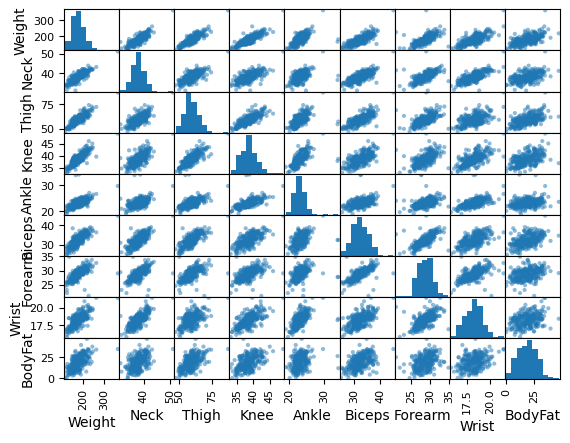

In [5]:
from pandas.plotting import scatter_matrix
attributes = ['Weight', 'Neck', 'Thigh', 'Knee', 'Ankle',  'Biceps', 'Forearm', 'Wrist', 'BodyFat']
scatter_matrix(df[attributes])

array([[<Axes: xlabel='Density', ylabel='Density'>,
        <Axes: xlabel='Height', ylabel='Density'>,
        <Axes: xlabel='Chest', ylabel='Density'>,
        <Axes: xlabel='Abdomen', ylabel='Density'>,
        <Axes: xlabel='Hip', ylabel='Density'>,
        <Axes: xlabel='BodyFat', ylabel='Density'>],
       [<Axes: xlabel='Density', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Chest', ylabel='Height'>,
        <Axes: xlabel='Abdomen', ylabel='Height'>,
        <Axes: xlabel='Hip', ylabel='Height'>,
        <Axes: xlabel='BodyFat', ylabel='Height'>],
       [<Axes: xlabel='Density', ylabel='Chest'>,
        <Axes: xlabel='Height', ylabel='Chest'>,
        <Axes: xlabel='Chest', ylabel='Chest'>,
        <Axes: xlabel='Abdomen', ylabel='Chest'>,
        <Axes: xlabel='Hip', ylabel='Chest'>,
        <Axes: xlabel='BodyFat', ylabel='Chest'>],
       [<Axes: xlabel='Density', ylabel='Abdomen'>,
        <Axes: xlabel='Height', ylabel='Abdomen'

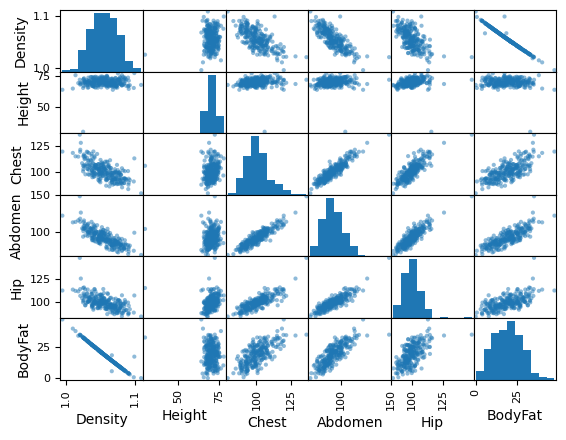

In [6]:
from pandas.plotting import scatter_matrix
attributes = ['Density', 'Height', 'Chest', 'Abdomen', 'Hip','BodyFat']
scatter_matrix(df[attributes])

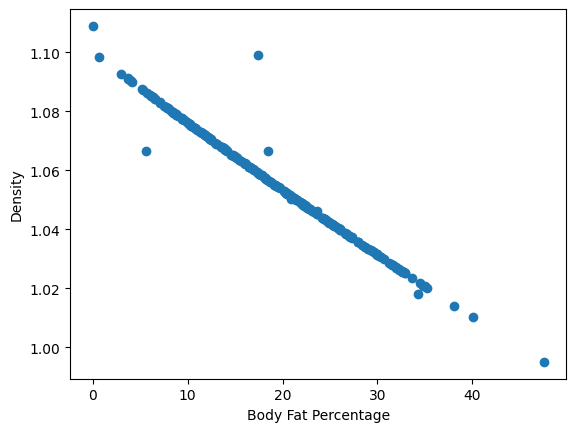

In [7]:
density = df['Density']
body_fat = df['BodyFat']

plt.scatter(body_fat, density)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Density')
plt.show()

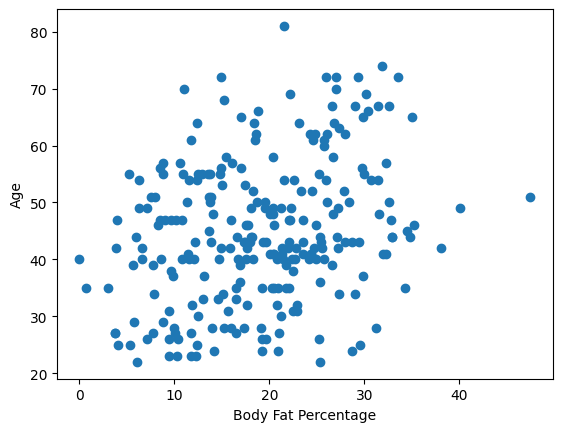

In [8]:
age = df['Age']
body_fat = df['BodyFat']

plt.scatter(body_fat, age)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Age')
plt.show()

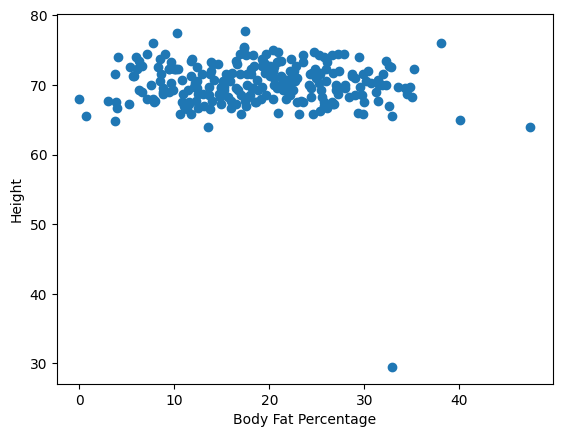

In [9]:
height = df['Height']
body_fat = df['BodyFat']

plt.scatter(body_fat, height)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Height')
plt.show()

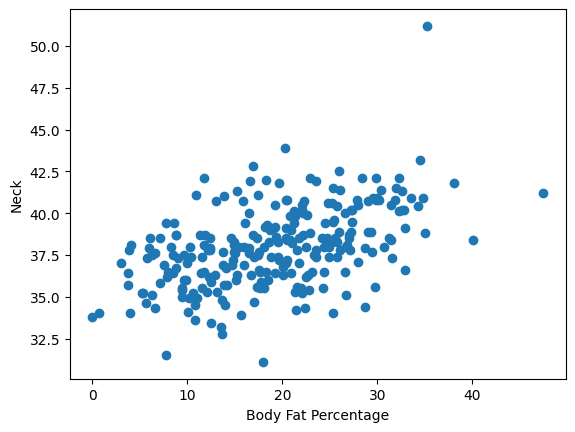

In [10]:
neck = df['Neck']
body_fat = df['BodyFat']

plt.scatter(body_fat, neck)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Neck')
plt.show()

In [ ]:
abdomen = df['Abdomen']
body_fat = df['BodyFat']

plt.scatter(body_fat, abdomen)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Abdomen')
plt.show()

In [ ]:
abdomen = df['Hip']
body_fat = df['BodyFat']

plt.scatter(body_fat, hip)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Hip')
plt.show()